In [1]:
"""
Copyright (C) 2022 Dominik Lentrodt

This file is part of pyrot.

pyrot is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

pyrot is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with pyrot.  If not, see <http://www.gnu.org/licenses/>.
"""

%matplotlib inline

### Import packages

In [2]:
# for calculations
import numpy as np
import scipy as sp
from scipy.signal import argrelextrema

# for plotting
import matplotlib
import matplotlib.pylab as plt

In [3]:
### for development ###
# import os
# import sys
# module_path = os.path.abspath(os.path.join('../src'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

# import pyrot

In [4]:
### if using installed distribution ###
import pyrot

### Example system calculation

Define system

In [5]:
tThin = 0.01 #thin layer
N = [1.0,   10.0, 1.0,   10.0, 1.0] # Refractive index of each layer
T = [ -1, tThin, 1.0, tThin,  -1] # Thicknesses of each layer

omega = np.linspace(0.001, 15., 200000) # incident frequency / wavenumber

In [6]:
### atom parameters ###
atom_om  = 3.623
atom_om2 = 6.536
atom_om3 = 9.564
atoms_params = [[0.61, 0.01, atom_om,  0.002],
                #[0.61, 0.01, atom_om2, 0.0],
                [0.61, 0.01, atom_om3, 0.002],
               ]

In [7]:
cavity = pyrot.Cavity1d(N, T)
atoms  = pyrot.CavityAtoms1d(N, T, atoms_params)

Calculate **empty cavity** scattering

In [8]:
%%time
R_empty = cavity.reflection_intensity(omega)
T_empty = cavity.transmission_intensity(omega)

CPU times: user 151 ms, sys: 45.3 ms, total: 197 ms
Wall time: 196 ms


Calculate reflection minimum

In [9]:
max_inds = argrelextrema(R_empty, np.less)
ref_min  = omega[max_inds[0][1]]+0.000001 # small number to avoid divide by zeroes
ref_min2 = omega[max_inds[0][2]]+0.000001 # small number to avoid divide by zeroes
ref_min3 = omega[max_inds[0][3]]+0.000001 # small number to avoid divide by zeroess
print(ref_min)
print(ref_min2)
print(ref_min3)

3.6230526252581265
6.536172970859855
9.56358626792634


Calculate cavity scattering with atom (**"Full" result**)

In [10]:
%%time
R_atoms = atoms.linear_reflection_intensity(omega)
print("###")
T_atoms = atoms.linear_transmission_intensity(omega)

###
CPU times: user 236 ms, sys: 61.7 ms, total: 298 ms
Wall time: 297 ms


Print linear refractive index with atom delta approximated as thin layer

In [11]:
n_int, t_int = atoms.linear_layer_system_with_atom(omega)
print(n_int)
print(t_int)

[1.0, 10.0, 1.0, array([5.13556229e+06+1.48210885e-01j, 4.77728781e+06+1.48210887e-01j,
       4.46574228e+06+1.48210890e-01j, ...,
       2.72329370e-02+2.45423783e+02j, 2.72322530e-02+2.45420514e+02j,
       2.72315692e-02+2.45417244e+02j]), 1.0, 10.0, 1.0]
[-1, 0.01, 0.59999999995, 1e-10, 0.39999999995, 0.01, -1]


Calculate cavity scattering with atom (**Rotating wave approximation**)

In [12]:
%%time
R_atoms_rot = atoms.linear_reflection_intensity(omega, formula_option='Rot')
print("###")
T_atoms_rot = atoms.linear_transmission_intensity(omega, formula_option='Rot')

###
CPU times: user 233 ms, sys: 59.9 ms, total: 293 ms
Wall time: 292 ms


### Plot

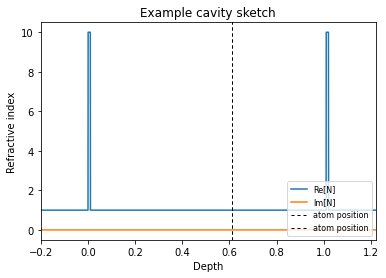

In [13]:
t_tot = np.sum(T[1:-1])
outside_buffer = 0.2
depth = np.linspace(-outside_buffer, t_tot+outside_buffer, 10000)

#cavity.draw_cav(depth)
atoms.draw_cav(depth)

In [14]:
### plot meta params ###
resonant_layer_idx = 3

zoom_dif  = 0.05
zoom_dif2 = 0.05

zoom_dif_ref  = 0.002
zoom_dif2_ref = 0.002
ylim_ref = [-0.5e5, 0.5e5]

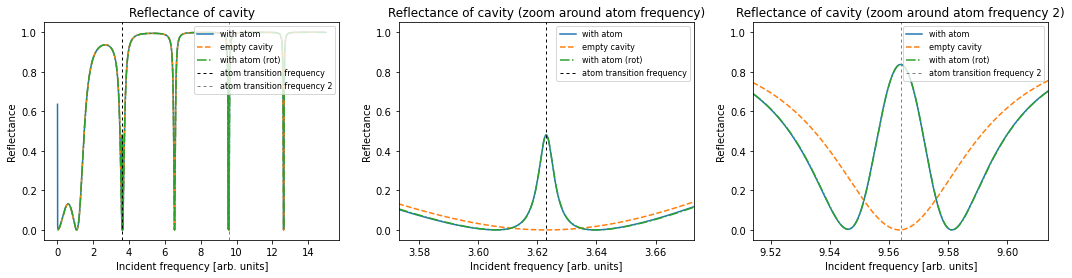

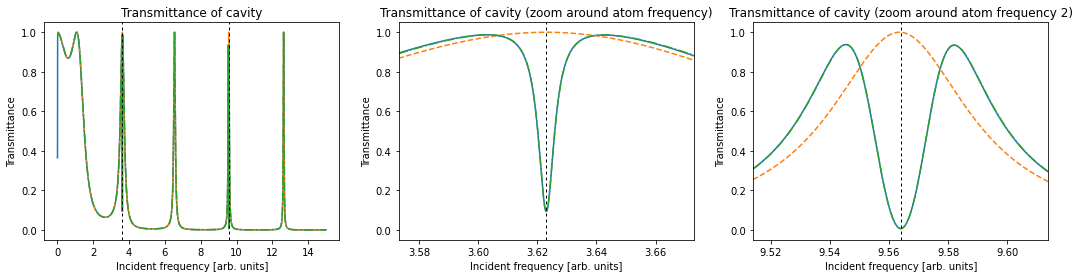

In [15]:
### reflection ###
plt.figure(figsize=(6*3,4))

plt.subplot(131, xlabel='Incident frequency [arb. units]', ylabel='Reflectance',
            title='Reflectance of cavity')
plt.plot(omega, R_atoms, label='with atom')
plt.plot(omega, R_empty, '--', label='empty cavity')
plt.plot(omega, R_atoms_rot, '-.', label='with atom (rot)')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')
plt.axvline(atom_om3, color='gray', dashes=[3,3], lw=1.0, label='atom transition frequency 2')
plt.legend(loc=1, fontsize=8)

plt.subplot(132, xlabel='Incident frequency [arb. units]', ylabel='Reflectance',
            title='Reflectance of cavity (zoom around atom frequency)')
plt.plot(omega, R_atoms, label='with atom')
plt.plot(omega, R_empty, '--', label='empty cavity')
plt.plot(omega, R_atoms_rot, '-.', label='with atom (rot)')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')

plt.xlim([atom_om-zoom_dif, atom_om+zoom_dif])
plt.legend(loc=1, fontsize=8)

plt.subplot(133, xlabel='Incident frequency [arb. units]', ylabel='Reflectance',
            title='Reflectance of cavity (zoom around atom frequency 2)')
plt.plot(omega, R_atoms, label='with atom')
plt.plot(omega, R_empty, '--', label='empty cavity')
plt.plot(omega, R_atoms_rot, '-.', label='with atom (rot)')
plt.axvline(atom_om3, color='gray', dashes=[3,3], lw=1.0, label='atom transition frequency 2')

plt.xlim([atom_om3-zoom_dif2, atom_om3+zoom_dif2])
plt.legend(loc=1, fontsize=8)

plt.show()

### transmission ###
plt.figure(figsize=(6*3,4))

plt.subplot(131, xlabel='Incident frequency [arb. units]', ylabel='Transmittance',
            title='Transmittance of cavity')
plt.plot(omega, T_atoms, label='with atom')
plt.plot(omega, T_empty, '--', label='empty cavity')
plt.plot(omega, T_atoms_rot, '-.', label='with atom (rot)')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')
plt.axvline(atom_om3, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency 2')
#plt.legend(loc=4, fontsize=8)

plt.subplot(132, xlabel='Incident frequency [arb. units]', ylabel='Transmittance',
            title='Transmittance of cavity (zoom around atom frequency)')
plt.plot(omega, T_atoms, label='with atom')
plt.plot(omega, T_empty, '--', label='empty cavity')
plt.plot(omega, T_atoms_rot, '-.', label='with atom (rot)')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')

plt.xlim([atom_om-zoom_dif, atom_om+zoom_dif])
#plt.legend(loc=4, fontsize=8)

plt.subplot(133, xlabel='Incident frequency [arb. units]', ylabel='Transmittance',
            title='Transmittance of cavity (zoom around atom frequency 2)')
plt.plot(omega, T_atoms, label='with atom')
plt.plot(omega, T_empty, '--', label='empty cavity')
plt.plot(omega, T_atoms_rot, '-.', label='with atom (rot)')
plt.axvline(atom_om3, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency 2')

plt.xlim([atom_om3-zoom_dif2, atom_om3+zoom_dif2])
#plt.legend(loc=4, fontsize=8)

plt.show()